## Gradient Boosting Algorithm
> Gradient boosting is one of the most powerful techniques for building predictive models.

### Problem Statement
- Using the Boston Housing Data, predict the prices using Gradient Boosting (XGBoost)

### Preparing the Enviornment

In [26]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading the Data

In [27]:
#import it from scikit-learn 
boston = load_boston()
print(boston.keys()) #boston variable itself is a dictionary, so you can check for its keys using the .keys() method.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [28]:
print(boston.data.shape)

(506, 13)


In [29]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [30]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Exploratory Data Analysis

In [31]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
data['PRICE'] = boston.target #Dependent Variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [33]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [34]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualization

Box plot for outliers

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

<AxesSubplot:>

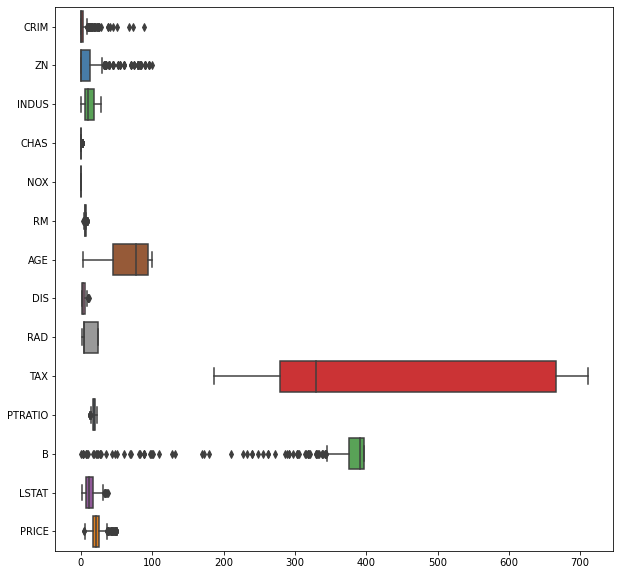

In [56]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,orient='h',palette='Set1')
#checking for any outliers in the data

<AxesSubplot:xlabel='TAX'>

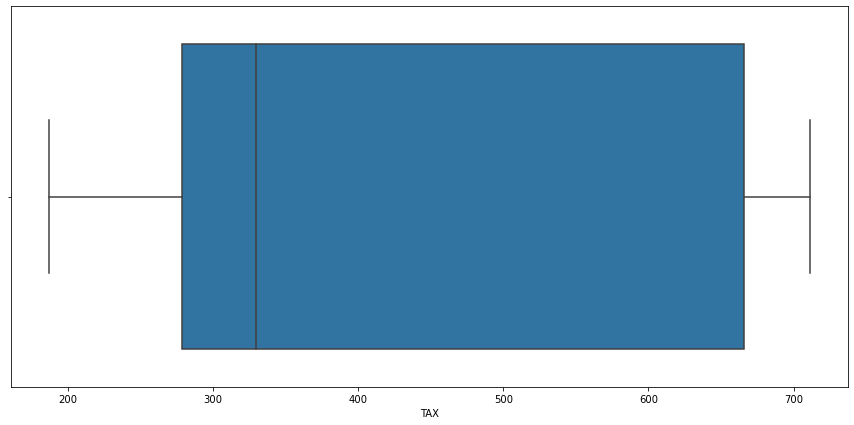

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(x=data['TAX'])

<AxesSubplot:xlabel='CRIM'>

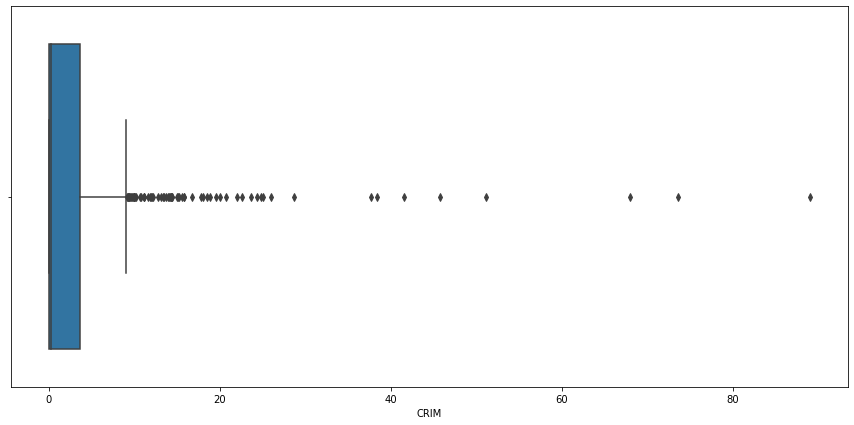

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(x=data['CRIM'])

<AxesSubplot:xlabel='B'>

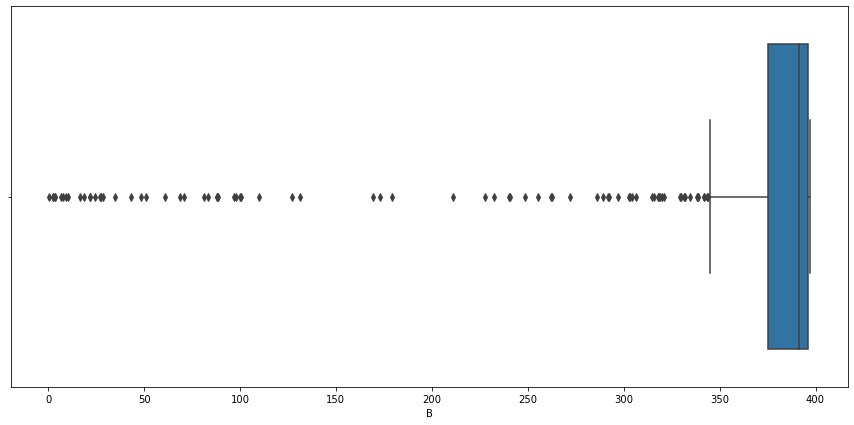

In [53]:
plt.figure(figsize=(15,7))
sns.boxplot(x=data['B'])

<AxesSubplot:xlabel='LSTAT'>

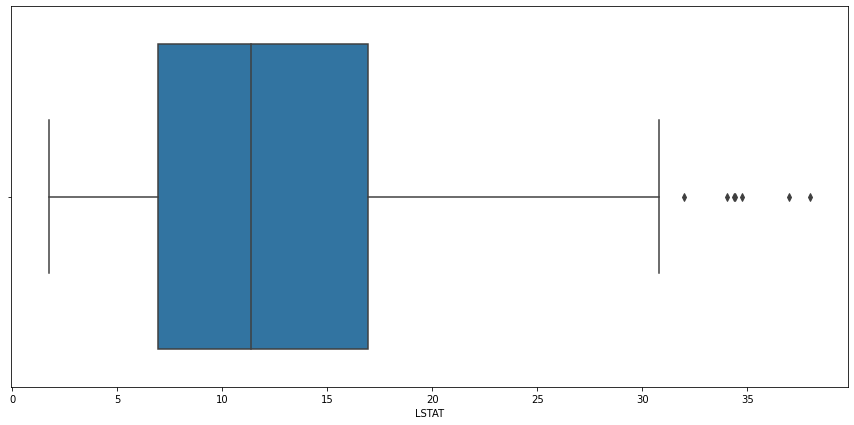

In [57]:
plt.figure(figsize=(15,7))
sns.boxplot(x=data['LSTAT'])

Correlation matrix

Correlation coefficients quantify the association between variables or features of a dataset. These statistics are of high importance for science and technology, and Python has great tools that you can use to calculate them. SciPy, NumPy, and Pandas correlation methods are fast, comprehensive, and well-documented.

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. You can use the built-in . corr() method on a pandas DataFrame to easily calculate the correlation matrix. Correlation ranges from -1 to 1

In [36]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

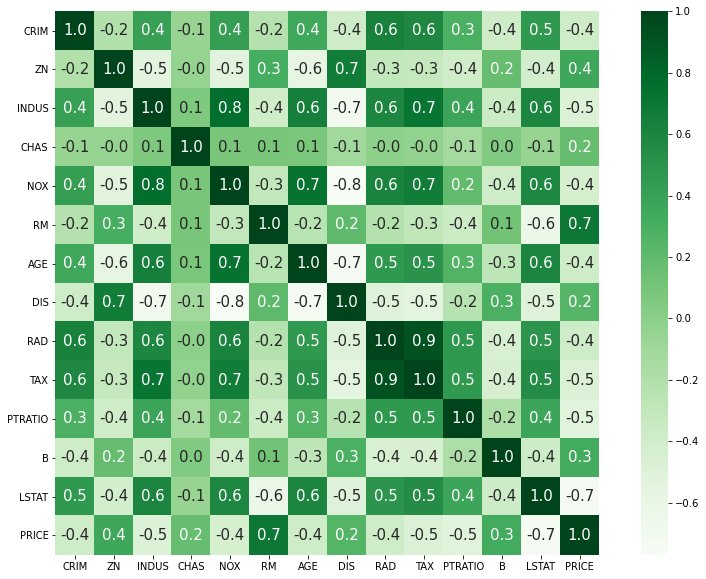

In [54]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [9]:
#Separate the target variable and rest of the variables using .iloc to subset the data.
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [10]:
#XGBoost supports and gives it acclaimed performance and efficiency gains
data_dmatrix = xgb.DMatrix(data=X,label=y)

### Hyper Parameters in XGBoost
- **learning_rate**: step size shrinkage used to prevent overfitting. Range is [0,1]
- **max_depth**: determines how deeply each tree is allowed to grow during any boosting round.
- **subsample**: percentage of samples used per tree. Low value can lead to underfitting.
- **colsample_bytree**: percentage of features used per tree. High value can lead to overfitting.
- **n_estimators**: number of trees you want to build.
- **objective**: determines the loss function to be used like reg:linear for regression problem
- **reg:logistic** for classification problems with only decision, binary:logistic for classification problems with probability

### Regualarization Parameters
- **gamma**: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- **alpha**: L1 regularization on leaf weights. A large value leads to more regularization.
- **lambda**: L2 regularization on leaf weights and is smoother than L1 regularization.

In [11]:
#Splitting the Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
#Fitting the XGBoost Model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [13]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[20:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 10.423243


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Cross Validation:
- **num_boost_round**: denotes the number of trees you build (analogous to n_estimators)
- **metrics**: tells the evaluation metrics to be watched during CV
- **as_pandas**: to return the results in a pandas DataFrame.
- **early_stopping_rounds**: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
- **seed**: for reproducibility of results.

In [22]:
#k-fold Cross Validation using XGBoost 
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
params

{'objective': 'reg:linear',
 'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'alpha': 10}

In [15]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[20:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750757,0.036152,21.765523,0.028850
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118633,18.157336,0.116038
3,16.458958,0.169189,16.623974,0.191414
4,15.074782,0.183546,15.254608,0.213612


In [61]:
cv_results["test-rmse-mean"].tail(1)

49    3.99692
Name: test-rmse-mean, dtype: float64

In [21]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xg_reg

[20:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


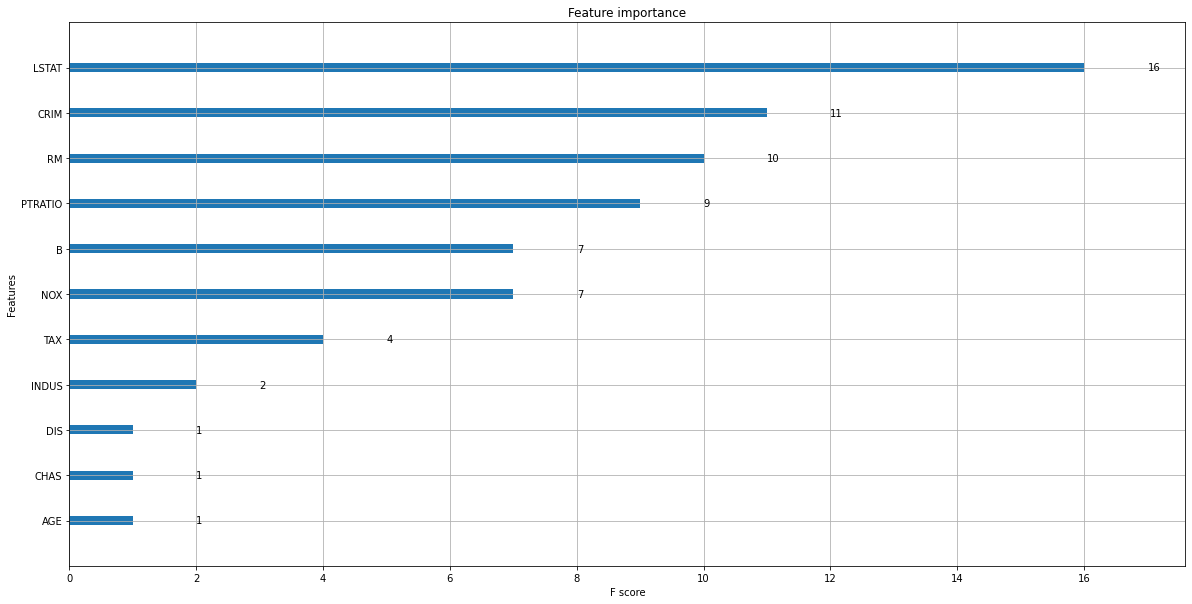

In [64]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 7]
plt.show()